# Esperimento Sul Pendolo Fisico

## Importo Le Librerie

In [ ]:
import numpy as np  
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit 
from scipy import odr
from ipywidgets import interact, interact_manual, FloatSlider, Checkbox, BoundedFloatText
from google.colab import files
from pprint import pprint

## Fit Sinusoidale

### Carico I Dati

Non caricare files con lo stesso nome, eliminare prima quelli preesistenti per evitare conflitti.

In [ ]:
# PATH_GRANDI_OSCILLAZIONI = list(files.upload().keys())[0] #chiede di caricare il file e ne estrae il nome
PATH_GRANDI_OSCILLAZIONI = "grandi_oscillazioni.txt" # se il file è già presente o è stato caricato a mano

In [ ]:
PATH_TEMPI_BREVI_LUNGHEZZA_STANDARD = list(files.upload().keys())[0] #chiede di caricare il file e ne estrae il nome
# PATH_TEMPI_BREVI_LUNGHEZZA_STANDARD = "" # se il file è già presente o è stato caricato a mano

Saving dati_tempi_brevi_lunghezza_standard.txt to dati_tempi_brevi_lunghezza_standard.txt


In [ ]:
PATH_TEMPI_BREVI_LUNGHEZZA_RIDOTTA = list(files.upload().keys())[0] #chiede di caricare il file e ne estrae il nome
# PATH_TEMPI_BREVI_LUNGHEZZA_RIDOTTA = "" # se il file è già presente o è stato caricato a mano

Saving dati_tempi_brevi_lunghezza_ridotta.txt to dati_tempi_brevi_lunghezza_ridotta.txt


### Importo I Dati

#### Grandi Oscillazioni

La lettura del file dati viene effettuata assumendo che siano formattati in un file di testo, con virgole (,) come separatore, con le colonne corrispondenti a 

 $$Tempo (s) \quad|\quad  Posizione (m)$$

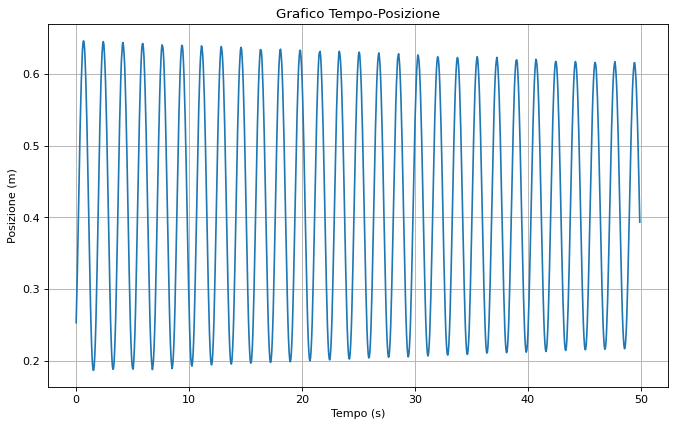

In [ ]:
DEBUG = False
LIMIT = 1000

dati_grandi_oscillazioni = {"tempo": [], "posizione": []}

with open(PATH_GRANDI_OSCILLAZIONI, "r") as f:
  for line in f.readlines()[1:LIMIT]:
    dati = line.split(",")
    dati_grandi_oscillazioni["tempo"].append(float(dati[0]))
    dati_grandi_oscillazioni["posizione"].append(float(dati[1]))
  
if DEBUG:
  pprint(dati_grandi_oscillazioni)

tempi = np.array(dati_grandi_oscillazioni["tempo"])
posizioni = np.array(dati_grandi_oscillazioni["posizione"])

plt.figure(figsize=(10, 6), dpi=80)
plt.title("Grafico Tempo-Posizione")
plt.grid()
plt.xlabel("Tempo (s)")
plt.ylabel("Posizione (m)")
_ = plt.plot(tempi, posizioni)

#### Tempi Brevi Lunghezza Standard

La lettura del file dati viene effettuata assumendo che siano formattati in un file di testo, con tabulazioni (\t) come separatore, con le colonne corrispondenti a 

 $$\text{Tempo-1 (s)} \quad|\quad  \text{Posizione-1 (m)}\quad|\quad\text{Tempo-2 (s)} \quad|\quad  \text{Posizione-2 (m)}\quad|\quad\text{Tempo-N (s)} \quad|\quad  \text{Posizione-N (m)}\quad|\quad$$

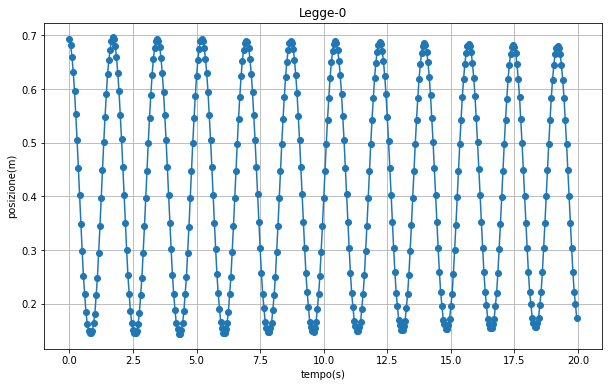

In [ ]:
AMOUNT = 1
LIMIT = 400
DEBUG = False

# creo il dizionario che conterrà i dati
dati_tempi_brevi_lunghezza_standard = {}

with open(PATH_TEMPI_BREVI_LUNGHEZZA_STANDARD, "r") as f:
  for index in range(int(len(f.readline().split("\t")) / 2)):
    dati_tempi_brevi_lunghezza_standard[f"tempo-{index}"] = []
    dati_tempi_brevi_lunghezza_standard[f"posizione-{index}"] = []
  for line in f.readlines()[:LIMIT]:
    for index in range(int(len(line.split("\t")) / 2)):
      dati_tempi_brevi_lunghezza_standard[f"tempo-{index}"].append(float(line.split("\t")[2 * index]))
      dati_tempi_brevi_lunghezza_standard[f"posizione-{index}"].append(float(line.split("\t")[2 * index + 1]))
  for index in range(int(len(dati_tempi_brevi_lunghezza_standard) / 2)):
    dati_tempi_brevi_lunghezza_standard[f"tempo-{index}"] = np.array(dati_tempi_brevi_lunghezza_standard[f"tempo-{index}"])
    dati_tempi_brevi_lunghezza_standard[f"posizione-{index}"] = np.array(dati_tempi_brevi_lunghezza_standard[f"posizione-{index}"])

if DEBUG:
  pprint(dati_tempi_brevi_lunghezza_standard)


for index in range(int(len(dati_tempi_brevi_lunghezza_standard) / 2))[:AMOUNT]:
    t = dati_tempi_brevi_lunghezza_standard[f"tempo-{index}"]
    y = dati_tempi_brevi_lunghezza_standard[f"posizione-{index}"]
    plt.figure(figsize=(10, 6)) #visualizzo i dati importati
    plt.title(f"Legge-{index}")
    plt.xlabel("tempo(s)")
    plt.ylabel("posizione(m)")
    plt.grid()
    _ = plt.plot(t,y, marker='o')

#### Tempi Brevi Lunghezza Ridotta

La lettura del file dati viene effettuata assumendo che siano formattati in un file di testo, con tabulazioni (\t) come separatore, con le colonne corrispondenti a 

 $$\text{Tempo-1 (s)} \quad|\quad  \text{Posizione-1 (m)}\quad|\quad\text{Tempo-2 (s)} \quad|\quad  \text{Posizione-2 (m)}\quad|\quad\text{Tempo-N (s)} \quad|\quad  \text{Posizione-N (m)}\quad|\quad$$

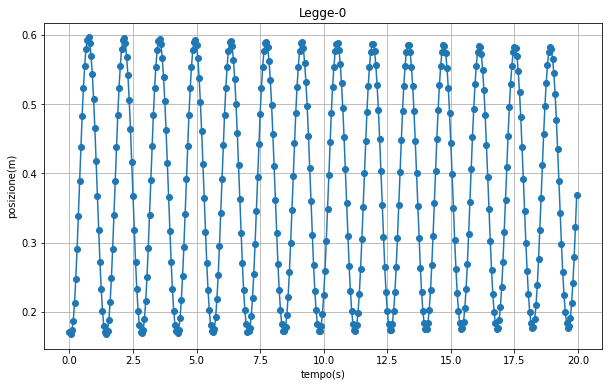

In [ ]:
AMOUNT = 1
LIMIT = 400
DEBUG = False

# creo il dizionario che conterrà i dati
dati_tempi_brevi_lunghezza_ridotta = {}

with open(PATH_TEMPI_BREVI_LUNGHEZZA_RIDOTTA, "r") as f:
  for index in range(int(len(f.readline().split("\t")) / 2)):
    dati_tempi_brevi_lunghezza_ridotta[f"tempo-{index}"] = []
    dati_tempi_brevi_lunghezza_ridotta[f"posizione-{index}"] = []
  for line in f.readlines()[:LIMIT]:
    for index in range(int(len(line.split("\t")) / 2)):
      dati_tempi_brevi_lunghezza_ridotta[f"tempo-{index}"].append(float(line.split("\t")[2 * index]))
      dati_tempi_brevi_lunghezza_ridotta[f"posizione-{index}"].append(float(line.split("\t")[2 * index + 1]))
  for index in range(int(len(dati_tempi_brevi_lunghezza_ridotta) / 2)):
    dati_tempi_brevi_lunghezza_ridotta[f"tempo-{index}"] = np.array(dati_tempi_brevi_lunghezza_ridotta[f"tempo-{index}"])
    dati_tempi_brevi_lunghezza_ridotta[f"posizione-{index}"] = np.array(dati_tempi_brevi_lunghezza_ridotta[f"posizione-{index}"])

if DEBUG:
  pprint(dati_tempi_brevi_lunghezza_ridotta)


for index in range(int(len(dati_tempi_brevi_lunghezza_ridotta) / 2))[:AMOUNT]:
    t = dati_tempi_brevi_lunghezza_ridotta[f"tempo-{index}"]
    y = dati_tempi_brevi_lunghezza_ridotta[f"posizione-{index}"]
    plt.figure(figsize=(10, 6)) #visualizzo i dati importati
    plt.title(f"Legge-{index}")
    plt.xlabel("tempo(s)")
    plt.ylabel("posizione(m)")
    plt.grid()
    _ = plt.plot(t,y, marker='o')

### Eseguo Il Fit Per Un Set Di Dati Molto Ampio

In [ ]:
#Definizione della funzione di fit 
def damped_sine(t, A, omega, phi, gamma, y0): 
  return A*np.exp(-gamma*t)*np.sin(omega*t+phi)+y0

In [ ]:
# Fitting routine
# definisce la funzione che stampa il grafico e esegue il fit dei dati. È sufficiente eseguirla una volta per salvare la funzione in memoria.

def fitplot_sin(A, omega, y0, phi, gamma, print_output=True, show_result=True):
  t = tempi
  y = posizioni

  guess = np.array([A,omega,phi,gamma,y0]) #array delle stime iniziali
  bounds = ([0,0,-np.pi,0,0], [10., 10, np.pi,1,2]) 
  
  popt, pcov = curve_fit(damped_sine, t, y, p0=guess, bounds=bounds)
  # calcolo il coefficiente R2 per valutare la bontà del fit
  residuals = y- damped_sine(t,popt[0],popt[1],popt[2],popt[3],popt[4])
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y-np.mean(y))**2)
  r_squared = 1 - (ss_res / ss_tot)

  label = ["A", "omega", "phi","gamma"]
  data = {}
  for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
    data[l] = v
    data[l + "_err"] = e

  if show_result:                                                                        
    #plot dei risultati
    plt.figure(figsize=(15, 10))
    plt.scatter(t,y,s=20,label="Exp.")     
    plt.plot(t,damped_sine(t,popt[0],popt[1],popt[2],popt[3],popt[4]),color=[1,0,0],label="Fit ($R^2=${:.4f})".format(r_squared),linewidth=2)
    plt.title("Grafico Tempo - Spostamento")
    plt.xlabel("tempo (s)")
    plt.ylabel("spostamento (m)")
    plt.grid(which='both')
    plt.legend()
    plt.show()
  
  if print_output:
    unit = ["m", "rad/s", "rad", ""]
    for l, v, e, u in zip(label, popt, np.sqrt(np.diag(pcov)), unit) :
      print("%10s = %9.6f +- %7.6f %s" % (l ,v, e, u))
    print("R-squared = "+str(r_squared))

  return data

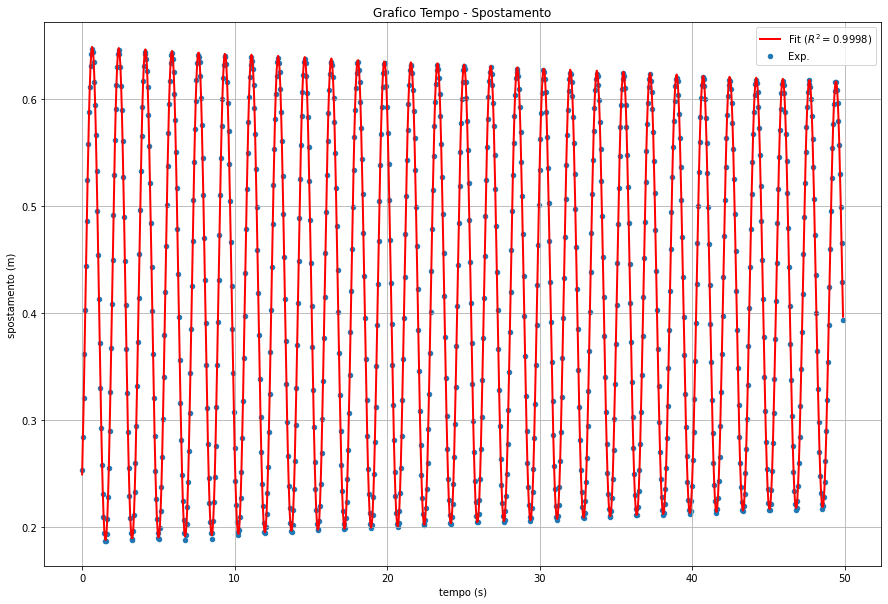

         A =  0.231728 +- 0.000222 m
     omega =  3.607105 +- 0.000034 rad/s
       phi = -0.816412 +- 0.000946 rad
     gamma =  0.003070 +- 0.000035 
R-squared = 0.9997560006612319


In [ ]:
dati_grandi_oscillazioni["dati"] = fitplot_sin(0.2, 1, 0, 0.4, 0, show_result=True, print_output=True)

### Eseguo Il Fit Per Più Set Di Dati Brevi E Lunghezza Variabile

In [ ]:
#Definizione della funzione di fit 
def damped_sine(t, A, omega, phi, gamma, y0): 
  return A*np.exp(-gamma*t)*np.sin(omega*t+phi)+y0

In [ ]:
def fitplot_sin(t, y, A, omega, y0, phi, gamma, print_output=True, show_result=True):
  
  guess = np.array([A,omega,phi,gamma,y0]) #array delle stime iniziali
  bounds = ([0,0,-np.pi,0,0], [10., 10, np.pi,1,2]) 
  
  popt, pcov = curve_fit(damped_sine, t, y, p0=guess, bounds=bounds)
  # calcolo il coefficiente R2 per valutare la bontà del fit
  residuals = y- damped_sine(t,popt[0],popt[1],popt[2],popt[3],popt[4])
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y-np.mean(y))**2)
  r_squared = 1 - (ss_res / ss_tot)

  label = ["A", "omega", "phi","gamma"]
  data = {}
  for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
    data[l] = v
    data[l + "_err"] = e

  if show_result:                                                                        
    #plot dei risultati
    plt.figure(figsize=(15, 10))
    plt.scatter(t,y,s=20,label="Exp.")     
    plt.plot(t,damped_sine(t,popt[0],popt[1],popt[2],popt[3],popt[4]),color=[1,0,0],label="Fit ($R^2=${:.4f})".format(r_squared),linewidth=2)
    plt.title("Grafico Tempo - Spostamento")
    plt.xlabel("tempo (s)")
    plt.ylabel("spostamento (m)")
    plt.grid(which='both')
    plt.legend()
    plt.show()
  
  if print_output:
    unit = ["m", "rad/s", "rad", ""]
    for l, v, e, u in zip(label, popt, np.sqrt(np.diag(pcov)), unit) :
      print("%10s = %9.6f +- %7.6f %s" % (l ,v, e, u))
    print("R-squared = "+str(r_squared))

  return data

#### Ricavo Tutte Le Informazioni Dai Fit

In [225]:
dati_fit_tempi_brevi_lunghezza_standard = {}
dati_fit_tempi_brevi_lunghezza_ridotta = {}
DEBUG = False
SHOW = False

# di seguito sono riportate delle grandezze misurate a mano durante l'esperimento

L =       0.72          # lunghezza del filo del pendolo
L_err =   0.0005        # errore sulla lunghezza del pendolo
Lr =      0.45          # lunghezza ridotta del filo del pendolo
Lr_err =  0.0005        # errore sulla lunghezza ridotta del filo del pendolo
M =       0.104         # massa del corpo appeso al pendolo
M_err =   0.0001        # errore sulla massa del corpo appeso al pendolo
R =       0.043 / 2      # raggio della massa attacata al pendolo
R_err =   0.0005 / 2    # errore sul raggio della massa attacata al pendolo

for index in range(int(len(dati_tempi_brevi_lunghezza_standard) / 2)):
  current = fitplot_sin(dati_tempi_brevi_lunghezza_standard[f"tempo-{index}"], dati_tempi_brevi_lunghezza_standard[f"posizione-{index}"], 0.2, 3, 0.4, 0, 0, print_output=False, show_result=SHOW)
  current["T0"] = (2 * np.pi) / current["omega"] # periodo
  current["T0_err"] = (current["omega_err"] / current["omega"]) * current["T0"] # errore sul periodo
  current["theta0"] = (current["A"] / (L + R)) # angolo iniziale espresso in radianti # * 180 / np.pi # angolo iniziale espresso in gradi
  current["theta0_err"] = (current["A_err"] / current["A"] + ((L_err + R_err)/(L + R))) * current["theta0"]
  dati_fit_tempi_brevi_lunghezza_standard[f"fit-{index}"] = current

for index in range(int(len(dati_tempi_brevi_lunghezza_ridotta) / 2)):
  current = fitplot_sin(dati_tempi_brevi_lunghezza_ridotta[f"tempo-{index}"], dati_tempi_brevi_lunghezza_ridotta[f"posizione-{index}"], 0.2, 4.5, 0.4, 0, 0, print_output=False, show_result=SHOW)
  current["T0"] = (2 * np.pi) / current["omega"] # periodo
  current["T0_err"] = (current["omega_err"] / current["omega"]) * current["T0"] # errore sul periodo
  current["theta0"] = (current["A"] / (Lr + R)) # angolo iniziale espresso in radianti # * 180 / np.pi # angolo iniziale espresso in gradi
  current["theta0_err"] = (current["A_err"] / current["A"] + ((Lr_err + R_err)/(Lr + R))) * current["theta0"]
  dati_fit_tempi_brevi_lunghezza_ridotta[f"fit-{index}"] = current


if DEBUG:
   pprint(dati_fit_tempi_brevi_lunghezza_standard)
   pprint(dati_fit_tempi_brevi_lunghezza_ridotta)

## Fit Della Legge Di Gravità

In [219]:
#Definizione funzione di fit 
def sin2_standard(g,theta): 
  return 2*(np.pi)*(np.sqrt((L + R)/g))*(1+0.25*(np.sin(theta/2))**2)

In [220]:
# Fitting routine
# definisce la funzione che stampa il grafico e esegue il fit dei dati.  È sufficiente eseguirla una volta per salvare la funzione in memoria.
def fitplot_period_standard(g, print_output=True):
  data_set = dati_fit_tempi_brevi_lunghezza_standard
  T = np.array([data_set[index]["T0"] for index in data_set.keys()])
  T_err = np.array([data_set[index]["T0_err"] for index in data_set.keys()])
  theta = np.array([data_set[index]["theta0"] for index in data_set.keys()])
  theta_err = np.array([data_set[index]["theta0_err"] for index in data_set.keys()])

  sin2_model = odr.Model(sin2_standard)
  fit_data = odr.RealData(theta, T, sx=theta_err, sy=T_err)
  fit = odr.ODR(fit_data, sin2_model, beta0=np.array([g]))
  out = fit.run()
  
  # calcolo il coefficiente R2 per valutare la bontà del fit
  residuals = T- sin2_standard(out.beta,theta)
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y-np.mean(y))**2)
  r_squared = 1 - (ss_res / ss_tot)
  sample_theta = np.linspace(0,np.amax(theta),1000)

  #plotting fit result
  plt.figure(figsize = (9, 6))
  plt.errorbar(theta, T,xerr=theta_err ,yerr=T_err ,linestyle='None', capsize=5, marker='o')
  plt.plot(sample_theta, sin2_standard(out.beta,sample_theta), color=[1,0,0], label="Fit ($R^2=${:.4f})".format(r_squared), linewidth=3)
  plt.xlabel(r"$\theta$ (rad)")
  plt.ylabel("Periodo T (s)")
  plt.grid(which='both')
  plt.legend()
  plt.show()
  
  if print_output:
    print("g = {:10.4f} +/- {:2.4f}".format(out.beta[0],out.sd_beta[0]))
  print("R-squared = "+str(r_squared))

In [221]:
def sin2_ridotto(g, theta):
  return 2*(np.pi)*(np.sqrt((Lr + R)/g))*(1+0.25*(np.sin(theta/2))**2)

In [222]:
# Fitting routine
# definisce la funzione che stampa il grafico e esegue il fit dei dati.  È sufficiente eseguirla una volta per salvare la funzione in memoria.
def fitplot_period_ridotto(g, print_output=True):
  data_set = dati_fit_tempi_brevi_lunghezza_ridotta
  T = np.array([data_set[index]["T0"] for index in data_set.keys()])
  T_err = np.array([data_set[index]["T0_err"] for index in data_set.keys()])
  theta = np.array([data_set[index]["theta0"] for index in data_set.keys()])
  theta_err = np.array([data_set[index]["theta0_err"] for index in data_set.keys()])

  sin2_model = odr.Model(sin2_ridotto)
  fit_data = odr.RealData(theta, T, sx=theta_err, sy=T_err)
  fit = odr.ODR(fit_data, sin2_model, beta0=np.array([g]))
  out = fit.run()
  
  # calcolo il coefficiente R2 per valutare la bontà del fit
  residuals = T- sin2_ridotto(out.beta,theta)
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y-np.mean(y))**2)
  r_squared = 1 - (ss_res / ss_tot)
  sample_theta = np.linspace(0,np.amax(theta),1000)

  #plotting fit result
  plt.figure(figsize = (9, 6))
  plt.errorbar(theta, T,xerr=theta_err ,yerr=T_err ,linestyle='None', capsize=5, marker='o')
  plt.plot(sample_theta, sin2_ridotto(out.beta,sample_theta), color=[1,0,0], label="Fit ($R^2=${:.4f})".format(r_squared), linewidth=3)
  plt.xlabel(r"$\theta$ (rad)")
  plt.ylabel("Periodo T (s)")
  plt.grid(which='both')
  plt.legend()
  plt.show()
  
  if print_output:
    print("g = {:10.4f} +/- {:2.4f}".format(out.beta[0],out.sd_beta[0]))
  print("R-squared = "+str(r_squared))

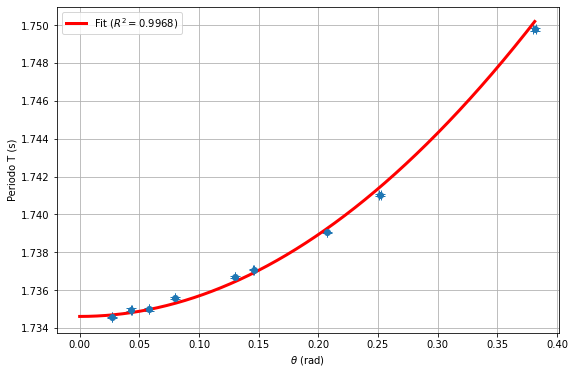

g =     9.7290 +/- 0.0009
R-squared = 0.9967711137596694


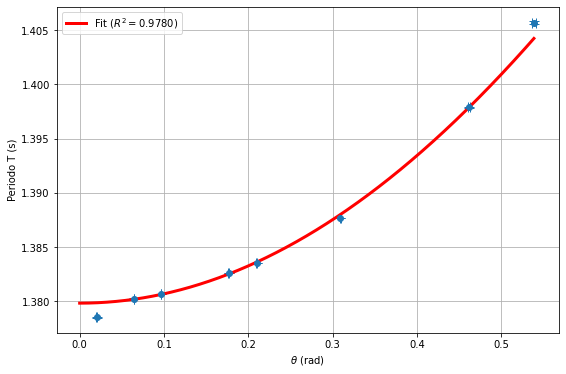

g =     9.7768 +/- 0.0011
R-squared = 0.9780192172799974


In [223]:
fitplot_period_standard(9, print_output=True)
fitplot_period_ridotto(9, print_output=True)

## Fit Della Legge $T(\theta)$

In [215]:
#Definizione funzione di fit 
def sin2(T0,theta): 
  return T0*(1+0.25*(np.sin(theta/2))**2)

In [216]:
# Fitting routine
# definisce la funzione che stampa il grafico e esegue il fit dei dati.  È sufficiente eseguirla una volta per salvare la funzione in memoria.
def fitplot_period_standard(T0, print_output=True):
  data_set = dati_fit_tempi_brevi_lunghezza_standard
  T = np.array([data_set[index]["T0"] for index in data_set.keys()])
  T_err = np.array([data_set[index]["T0_err"] for index in data_set.keys()])
  theta = np.array([data_set[index]["theta0"] for index in data_set.keys()])
  theta_err = np.array([data_set[index]["theta0_err"] for index in data_set.keys()])

  sin2_model = odr.Model(sin2)
  fit_data = odr.RealData(theta, T, sx=theta_err, sy=T_err)
  beta0 = np.array([T0]) #array of initial guesses
  
  fit = odr.ODR(fit_data, sin2_model, beta0=beta0)
  out = fit.run()
    
  # calcolo il coefficiente R2 per valutare la bontà del fit
  residuals = T- sin2(out.beta,theta)
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y-np.mean(y))**2)
  r_squared = 1 - (ss_res / ss_tot)
  
  sample_theta = np.linspace(0,np.amax(theta),1000)
 
  #plotting fit result
  plt.figure(figsize = (9, 6))
  plt.errorbar(theta, T,xerr=theta_err ,yerr=T_err ,linestyle='None', capsize=5, marker='o')
  plt.plot(sample_theta, sin2(out.beta,sample_theta), color=[1,0,0], label="Fit ($R^2=${:.4f})".format(r_squared), linewidth=3)
  plt.xlabel(r"$\theta$ (rad)")
  plt.ylabel("Periodo T (s)")
  plt.grid(which='both')
  plt.legend()
  plt.show()
  
  if print_output:
    print("T0 = {:10.4f} +/- {:2.4f}".format(out.beta[0],out.sd_beta[0]))
  print("R-squared = "+str(r_squared))

In [217]:
# Fitting routine
# definisce la funzione che stampa il grafico e esegue il fit dei dati.  È sufficiente eseguirla una volta per salvare la funzione in memoria.
def fitplot_period_ridotto(T0, print_output=True):
  data_set = dati_fit_tempi_brevi_lunghezza_ridotta
  T = np.array([data_set[index]["T0"] for index in data_set.keys()])
  T_err = np.array([data_set[index]["T0_err"] for index in data_set.keys()])
  theta = np.array([data_set[index]["theta0"] for index in data_set.keys()])
  theta_err = np.array([data_set[index]["theta0_err"] for index in data_set.keys()])

  sin2_model = odr.Model(sin2)
  fit_data = odr.RealData(theta, T, sx=theta_err, sy=T_err)
  beta0 = np.array([T0]) #array of initial guesses
  
  fit = odr.ODR(fit_data, sin2_model, beta0=beta0)
  out = fit.run()
    
  # calcolo il coefficiente R2 per valutare la bontà del fit
  residuals = T- sin2(out.beta,theta)
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y-np.mean(y))**2)
  r_squared = 1 - (ss_res / ss_tot)
  
  sample_theta = np.linspace(0,np.amax(theta),1000)
 
  #plotting fit result
  plt.figure(figsize = (9, 6))
  plt.errorbar(theta, T,xerr=theta_err ,yerr=T_err ,linestyle='None', capsize=5, marker='o')
  plt.plot(sample_theta, sin2(out.beta,sample_theta), color=[1,0,0], label="Fit ($R^2=${:.4f})".format(r_squared), linewidth=3)
  plt.xlabel(r"$\theta$ (rad)")
  plt.ylabel("Periodo T (s)")
  plt.grid(which='both')
  plt.legend()
  plt.show()
  
  if print_output:
    print("T0 = {:10.4f} +/- {:2.4f}".format(out.beta[0],out.sd_beta[0]))
  print("R-squared = "+str(r_squared))

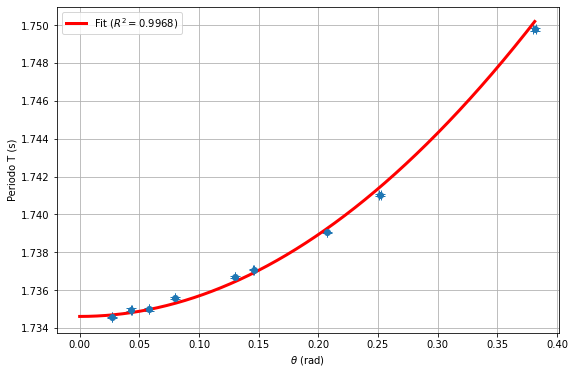

T0 =     1.7346 +/- 0.0001
R-squared = 0.9967711133370186


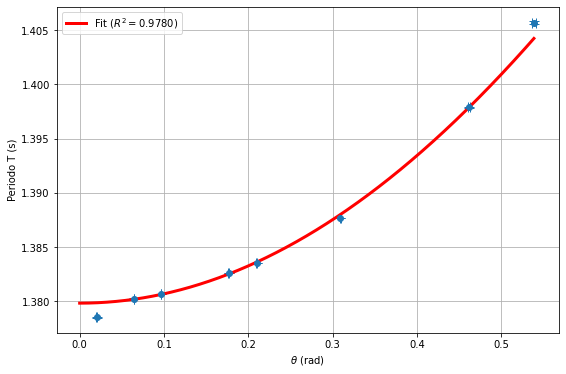

T0 =     1.3798 +/- 0.0001
R-squared = 0.9780192175307268


In [218]:
fitplot_period_standard(1)
fitplot_period_ridotto(1)